In [1]:
import os,sys
import numpy as np
import math as m
import nuSQUIDSpy as nsq
import pisa

<< PISA is running in double precision (FP64) mode; numba is running on CPU (single core) >>


In [2]:
from pisa.core.distribution_maker import DistributionMaker


## Pipeline Stuff and trying PISA stuff

In [3]:
path = "/afs/ifh.de/user/b/buchholl/scratch/software/fridge/analysis/"
neutrino_pipeline = "oscNext_flercnn_sterile/settings/pipeline/pipeline_oscNext_neutrinos_std_osc_nh_flercnn.cfg"
muon_pipeline = "oscNext_flercnn_sterile/settings/pipeline/pipeline_oscNext_muons.cfg"
template_pipeline_file = [neutrino_pipeline,muon_pipeline]

# Create a template distribution maker using the pipeline cfg file.
template_maker = DistributionMaker(template_pipeline_file)

[ WARNING] Could not find exact match for 1 nue_cc events (0.0002%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 43892 numu_cc events (4.2773%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 2025 nutau_cc events (0.5365%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 5 nuebar_cc events (0.0024%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 27780 numubar_cc events (5.7082%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 1368 nutaubar_cc events (0.8800%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 1 numu_nc events (0.0009%) in

In [4]:
dir(template_maker)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_pipelines',
 '_profile',
 '_repr_html_',
 '_set_rescaled_free_params',
 '_source_code_hash',
 'add_covariance',
 'detector_name',
 'empty_bin_indices',
 'get_outputs',
 'hash',
 'label',
 'metadata',
 'num_events_per_bin',
 'param_selections',
 'params',
 'pipelines',
 'profile',
 'randomize_free_params',
 'reset_all',
 'reset_free',
 'run',
 'select_params',
 'set_free_params',
 'set_nominal_by_current_values',
 'setup',
 'source_code_hash',
 'tabulate',
 'update_params']

In [5]:
template_maker.params.fixed

name,value,nominal_value,range,prior,units,is_fixed
flux_table,flux/honda-2015-spl-solmin-aa.d,flux/honda-2015-spl-solmin-aa.d,,,dimensionless,True
energy_pivot,24.0900951261,24.0900951261,,,gigaelectron_volt,True
pion_ratio,0.0,0.0,"[-0.25, 0.25]",+/- 0.05,dimensionless,True
barr_a_Pi,0.0,0.0,"[-0.5, 0.5]",+/- 0.1,dimensionless,True
barr_b_Pi,0.0,0.0,"[-1.5, 1.5]",+/- 0.3,dimensionless,True
barr_c_Pi,0.0,0.0,"[-0.5, 0.5]",+/- 0.1,dimensionless,True
barr_d_Pi,0.0,0.0,"[-1.5, 1.5]",+/- 0.3,dimensionless,True
barr_e_Pi,0.0,0.0,"[-0.25, 0.25]",+/- 0.05,dimensionless,True
barr_f_Pi,0.0,0.0,"[-0.5, 0.5]",+/- 0.1,dimensionless,True
barr_x_K,0.0,0.0,"[-0.5, 0.5]",+/- 0.1,dimensionless,True


In [6]:
template_maker.params.free

name,value,nominal_value,range,prior,units,is_fixed
delta_index,0,0,"[-0.5, 0.5]",+/- 0.1,dimensionless,False
barr_g_Pi,0,0,"[-1.5, 1.5]",+/- 0.3,dimensionless,False
barr_h_Pi,0,0,"[-0.75, 0.75]",+/- 0.15,dimensionless,False
barr_i_Pi,0,0,"[-3.05, 3.05]",+/- 0.61,dimensionless,False
barr_w_K,0,0,"[-2.0, 2.0]",+/- 0.4,dimensionless,False
barr_y_K,0,0,"[-1.5, 1.5]",+/- 0.3,dimensionless,False
theta23,45.3637,45.3637,"[0.0, 90.0]",uniform,degree,False
deltam31,0.00247996,0.00247996,"[0.001, 0.004]",uniform,electron_volt ** 2,False
Genie_Ma_QE,0,0,"[-2.0, 2.0]",+/- 1.0,dimensionless,False
Genie_Ma_RES,0,0,"[-2.0, 2.0]",+/- 1.0,dimensionless,False


In [7]:
template = template_maker.get_outputs(return_sum=False)

In [8]:
numucc=template[0]['numu_cc']
numubarcc=template[0]['numubar_cc']
numunc=template[0]['numu_nc']
numubarnc=template[0]['numubar_nc']

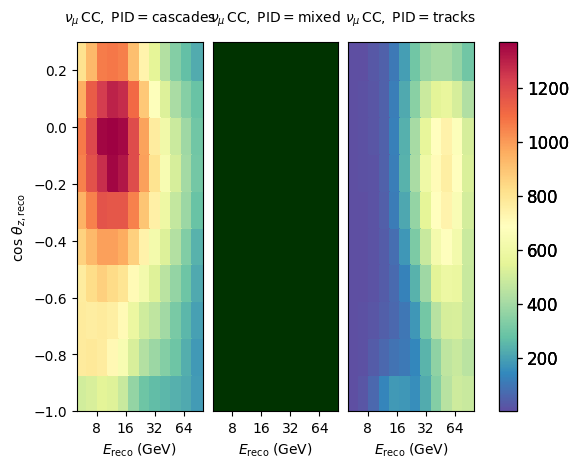

In [9]:
numutotal=numucc+numubarcc+numunc+numubarnc
numutotal.plot(title=r'Total \nu_\mu/\bar{\nu}_\mu cc+nc');

In [10]:
testmap_nus=template[0]
testmap_mus=template[1]

In [11]:
numuccs=testmap_nus['numu_cc']

(<Figure size 640x480 with 6 Axes>,
 <Axes: title={'center': '${\\nu_\\mu} \\, {\\rm CC},{\\;}{\\rm PID}={\\rm cascades}$'}, xlabel='$E_{\\rm reco} \\; \\left( \\mathrm{GeV} \\right)$', ylabel='$\\cos\\,\\theta_{z,{\\rm reco}}$'>,
 <matplotlib.colorbar.Colorbar at 0x7f43ddc355d0>)

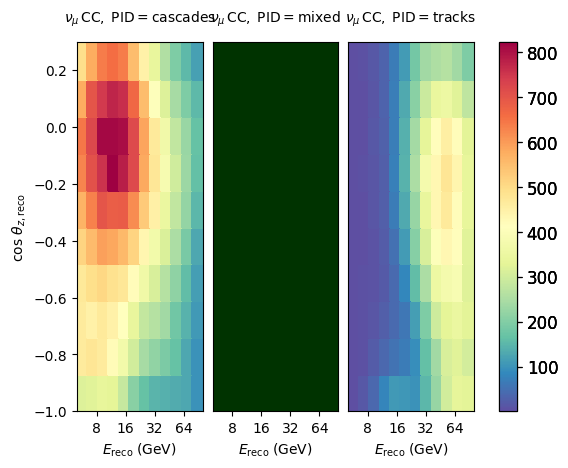

In [12]:
numuccs.plot()

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Test'}, xlabel='$E_{\\rm reco} \\; \\left( \\mathrm{GeV} \\right)$', ylabel='$\\cos\\,\\theta_{z,{\\rm reco}}$'>,
 <matplotlib.colorbar.Colorbar at 0x7f43dce85390>)

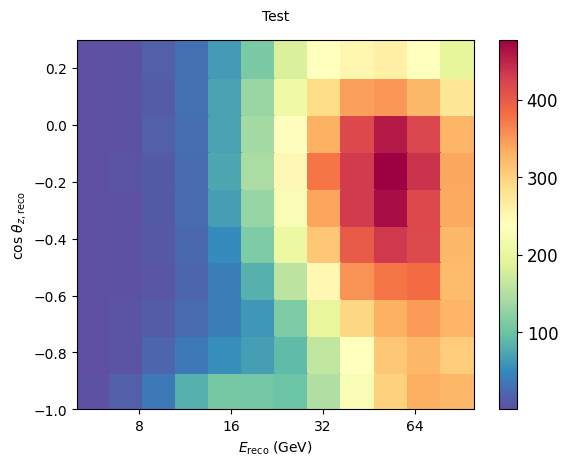

In [13]:
numuccs.split('pid')['numu_cc_pid_tracks'].plot(title='Test')

In [14]:
dir(testmap_nus)

['_MapSet__slots',
 '_MapSet__state_attrs',
 '__abs__',
 '__add__',
 '__class__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__pretty__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_name',
 '_repr_pretty_',
 'allclose',
 'apply_to_maps',
 'chi2_per_map',
 'chi2_total',
 'collate_by_name',
 'collate_by_num',
 'collate_with_names',
 'combine_re',
 'combine_wildcard',
 'compare',
 'downsample',
 'find_map',
 'fluctuate',
 'from_json',
 'hash',
 'hash_maps',
 'hashes',
 'i

In [15]:
dir(testmap_nus['numu_cc'])

['_Map__rdiv',
 '_Map__rsub',
 '__abs__',
 '__add__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__pretty__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_binning',
 '_full_comparison',
 '_hash',
 '_hist',
 '_name',
 '_normalize_values',
 '_repr_pretty_',
 '_slice_or_index',
 '_slots',
 '_state_attrs',
 '_tex',
 'allclose',
 'assert_compat',
 'barlow_llh',
 'binning',
 'chi2',
 'compare',
 'conv_llh',
 'correct_chi2',
 'downsample',
 'fluctuate',
 'from_json',
 'fu

numu_cc_pid_cascades
numu_cc_pid_mixed
numu_cc_pid_tracks


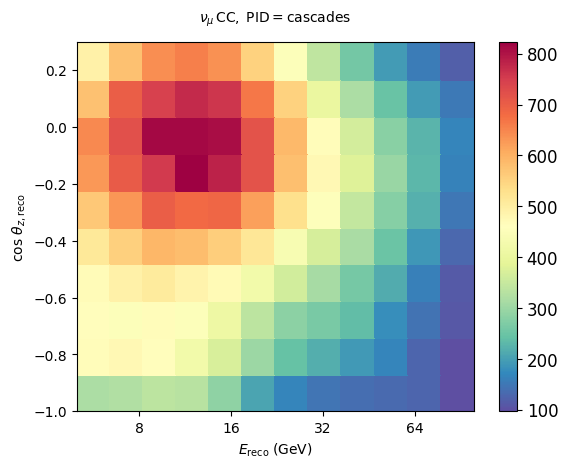

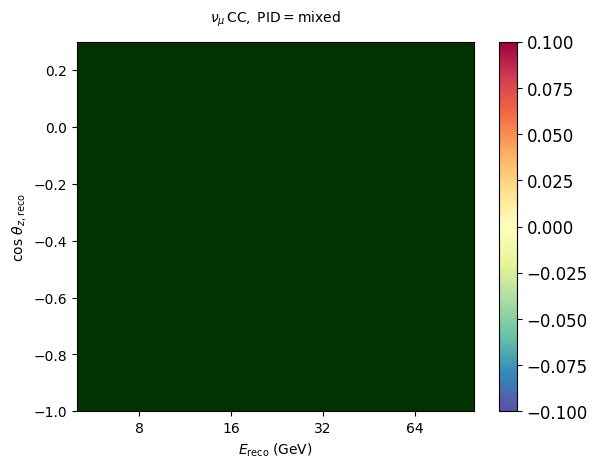

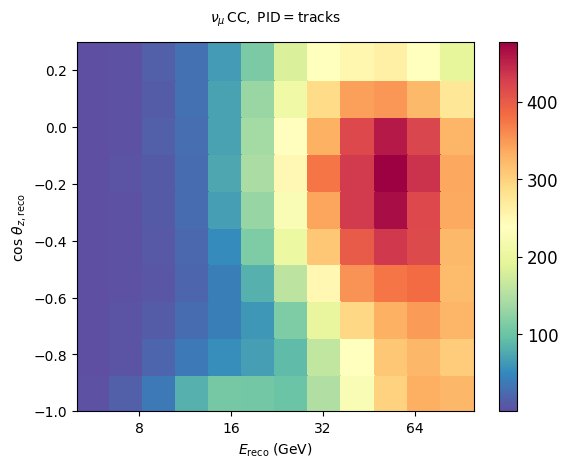

In [16]:
for t in testmap_nus['numu_cc'].split('pid'):
    t.plot()
    print(t.name)

In [17]:
data_pipeline_file = template_pipeline_file
data_maker = DistributionMaker(data_pipeline_file)

pseudodata_asimov = data_maker.get_outputs(return_sum=True)

print("Done!")
print("Generated livetime = %s" % data_maker.params.livetime.value)

[ WARNING] Could not find exact match for 1 nue_cc events (0.0002%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 43892 numu_cc events (4.2773%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 2025 nutau_cc events (0.5365%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 5 nuebar_cc events (0.0024%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 27780 numubar_cc events (5.7082%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 1368 nutaubar_cc events (0.8800%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 1 numu_nc events (0.0009%) in

In [18]:
merged_template = template_maker.get_outputs(return_sum=True)
asimov_llh = pseudodata_asimov.metric_total(merged_template,"llh")
print("LLH comparison between template and Asimov pseudodata = %s" % asimov_llh)

LLH comparison between template and Asimov pseudodata = 0.0


In [19]:
from pisa.utils.random_numbers import get_random_state

pseudodata_fluctuated = pseudodata_asimov.fluctuate(method='poisson', random_state=get_random_state(85345) )
fluctuated_llh = pseudodata_fluctuated.metric_total(merged_template,"llh")
print("LLH comparison between template and fluctuated pseudodata = %s" % fluctuated_llh)

[ WARNING] /afs/ifh.de/group/amanda/scratch/buchholl/software/snuvenv/lib/python3.10/site-packages/numpy/lib/function_base.py:2387: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)

[ WARNING] /afs/ifh.de/group/amanda/scratch/buchholl/software/pisa/pisa/utils/stats.py:226: RuntimeWarning: divide by zero encountered in log
  llh_val -= actual_values*np.log(actual_values) - actual_values

LLH comparison between template and fluctuated pseudodata = -112.84758573323143


In [20]:
print("Free params:")
print("  %s" % (template_maker.params.free.names,))
print("\nFixed params:")
print("  %s" % (template_maker.params.fixed.names,))

Free params:
  ('delta_index', 'barr_g_Pi', 'barr_h_Pi', 'barr_i_Pi', 'barr_w_K', 'barr_y_K', 'theta23', 'deltam31', 'Genie_Ma_QE', 'Genie_Ma_RES', 'dis_csms', 'aeff_scale', 'dom_eff', 'hole_ice_p0', 'hole_ice_p1', 'ice_abs', 'ice_scatter', 'bfr_eff', 'weight_scale')

Fixed params:
  ('flux_table', 'energy_pivot', 'pion_ratio', 'barr_a_Pi', 'barr_b_Pi', 'barr_c_Pi', 'barr_d_Pi', 'barr_e_Pi', 'barr_f_Pi', 'barr_x_K', 'barr_z_K', 'barr_w_antiK', 'barr_x_antiK', 'barr_y_antiK', 'barr_z_antiK', 'earth_model', 'YeI', 'YeM', 'YeO', 'detector_depth', 'prop_height', 'theta12', 'theta13', 'deltacp', 'deltam21', 'livetime', 'nutau_cc_norm', 'nutau_norm', 'nu_nc_norm', 'atm_muon_scale', 'delta_gamma_mu_file', 'delta_gamma_mu_spline_kind', 'delta_gamma_mu_variable', 'delta_gamma_mu')


In [21]:
param = template_maker.params["theta23"]
print("%s :" % param.name)
print("  Nominal value = %s" % param.nominal_value)
print("  Current value = %s" % param.value)
print("  Alowed range  = [%s,%s]" % (param.range[0],param.range[1]))
print("  Fixed         = %s" % param.is_fixed)
print("  Prior type    = %s" % param.prior.kind)

theta23 :
  Nominal value = 45.3637 degree
  Current value = 45.3637 degree
  Alowed range  = [0.0 degree,90.0 degree]
  Fixed         = False
  Prior type    = uniform


In [22]:
from pisa import ureg

In [23]:
template_maker.params.theta23.value = template_maker.params.theta23.nominal_value

[ WARNING] /afs/ifh.de/group/amanda/scratch/buchholl/software/pisa/pisa/core/binning.py:3031: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_mask = None if self.mask is None else self.mask[index]



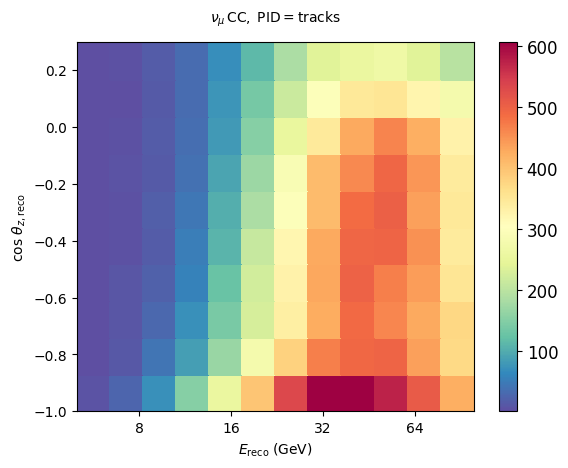

In [24]:
template_maker.params.theta23.value = 0. * ureg.degree
new_templates = template_maker.get_outputs(return_sum=False)[0]
new_numu_cc_tracks_map = new_templates['numu_cc'].slice(pid='tracks')
title = r'$%s$ tracks ($\theta_{23} = %s$)' % (
    new_numu_cc_tracks_map.tex,
    format(template_maker.params.theta23.value.to("deg"), '0.3g~L')
)
new_numu_cc_tracks_map.plot(title=title);

## Fitting stuff experimentation

In [25]:
from pisa.analysis.analysis import Analysis
import datetime
import matplotlib.pyplot as plt
analysis = Analysis()

In [26]:
minimizer_settings = { 
    "method":{
        "value":"slsqp",
        "desc":"no desc"
    },
    "options":{
        "value":{
            "maxiter":100,
            "ftol":1.e-5,
            "eps":1.e-4
        },
        "desc":{
            "maxiter":"Max iteration",
            "ftol":"Precision goal for the value of f in the stopping criterion",
            "eps":"Step size used for numerical approximation of the jacobian"}
    }
}

In [27]:
start_time = datetime.datetime.now()

# Peform the fit (may take a few mins)
fit_results,_ = analysis.fit_hypo(
    data_dist=pseudodata_fluctuated,        # The (pseudo)data MapSet
    hypo_maker=template_maker,              # The template maker
    hypo_param_selections="nh",             # Can specify some special selection of
                                            #   parameter values, here choosing the
                                            #   normal hierarchy
    metric="llh",                           # The metric for comparing the data and
                                            #   template, here we will maximise the
                                            #   Log-Likelihood (LLH)
    minimizer_settings=minimizer_settings,  # The minizer settings we defined above
    pprint=True)                            # Pretty printing (live display of free
                                            #   parameters as fits run)
    
end_time = datetime.datetime.now()
print("\nFit finished! Took %s" % (end_time-start_time))

                                                                                                                  (deg)       (eV**2)                                                                                                                                                  
 iter   funcalls      llh      | delta_index   barr_g_Pi    barr_h_Pi    barr_i_Pi     barr_w_K     barr_y_K     theta23      deltam31   Genie_Ma_QE  Genie_Ma_RES   dis_csms    aeff_scale    dom_eff    hole_ice_p0  hole_ice_p1    ice_abs    ice_scatter    bfr_eff    weight_scale
------ ---------- ------------ + ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------ ------------
[ WARNING] /afs/ifh.de/group/amanda/scratch/buchholl/software/pisa/pisa/utils/stats.py:226: RuntimeWarning: divide by zero encountered in log
  llh_val -= actua

In [28]:
print("\nFit successful = %s" % fit_results.minimizer_metadata["success"])
print("\nMinimizer result : %s = %s" % (fit_results.metric[0], fit_results.metric_val))


Fit successful = True

Minimizer result : llh = -108.05954017448907


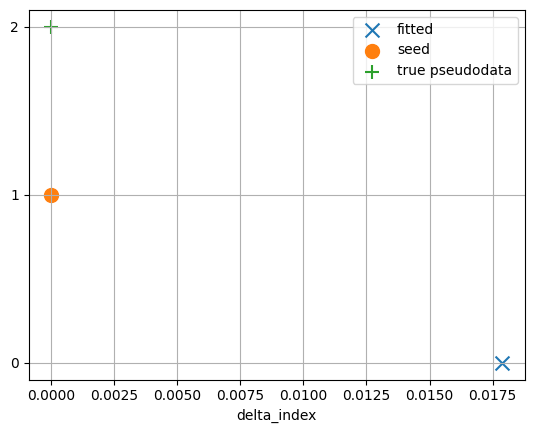

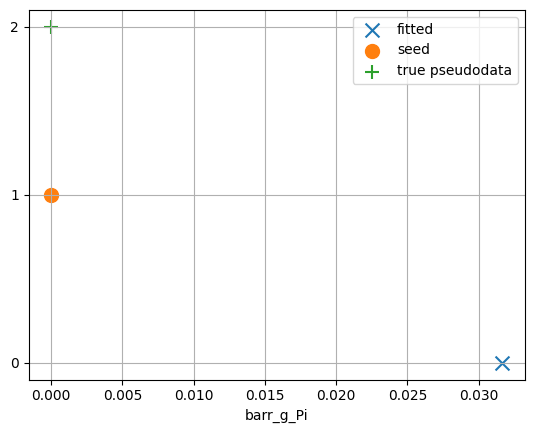

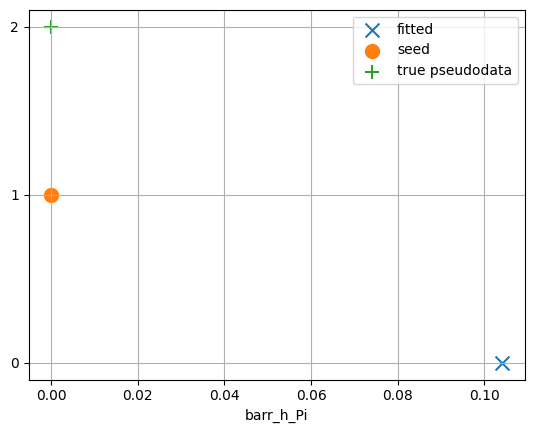

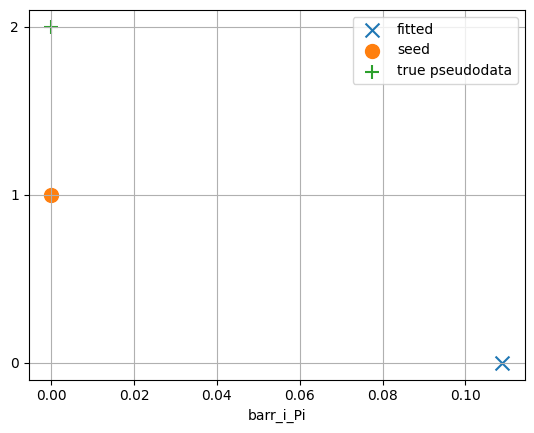

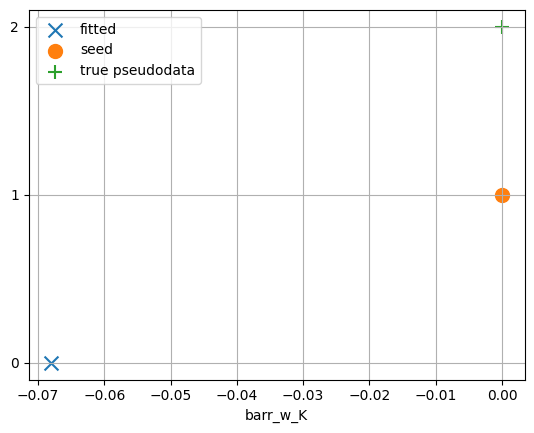

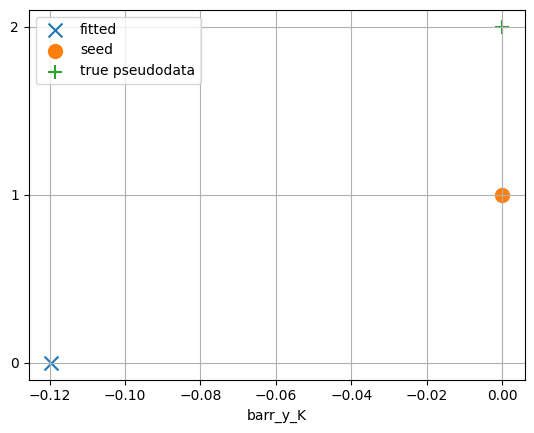

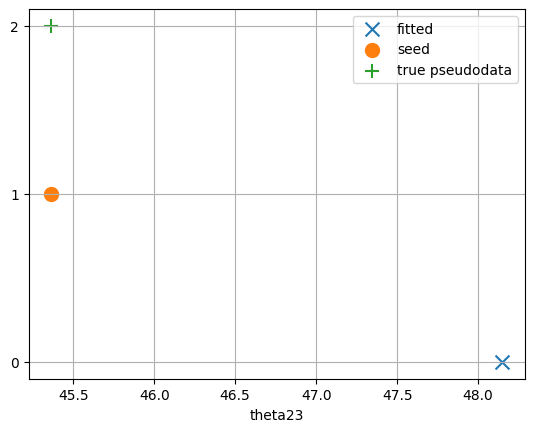

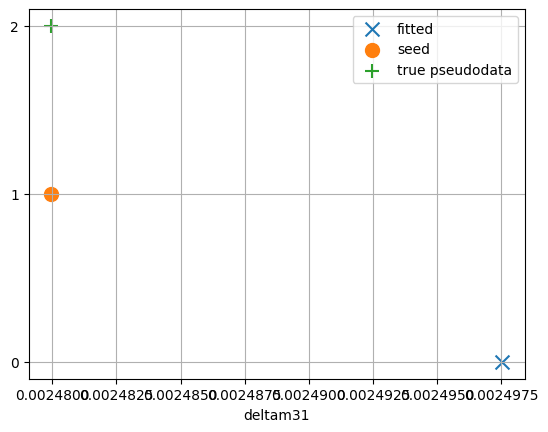

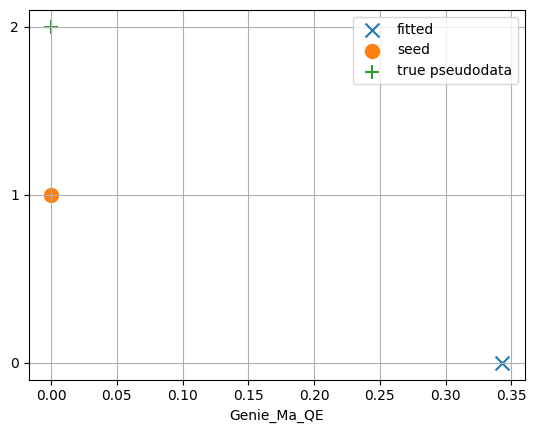

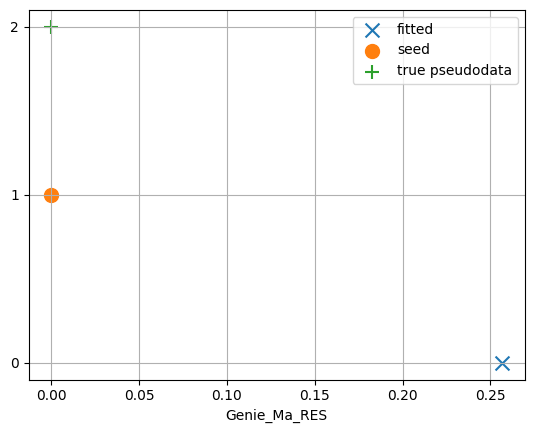

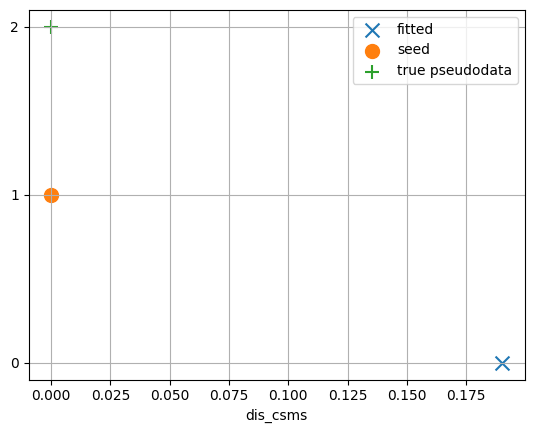

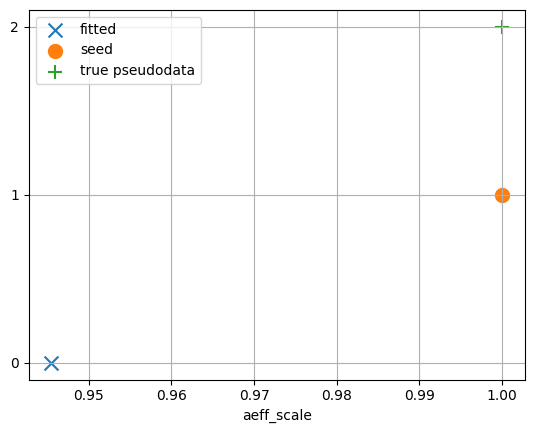

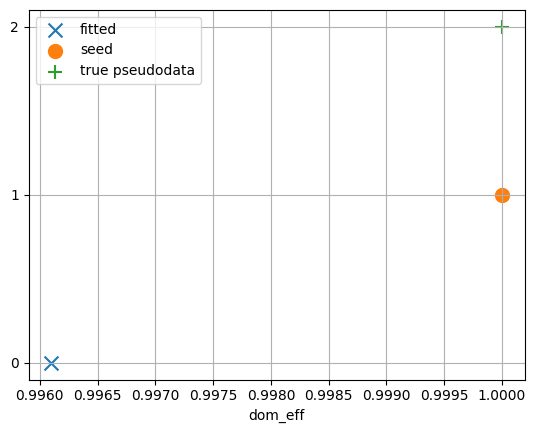

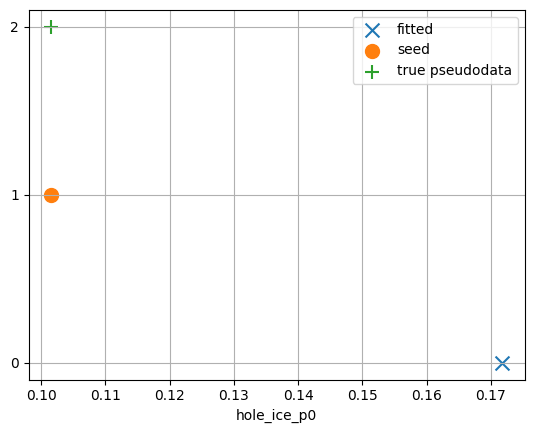

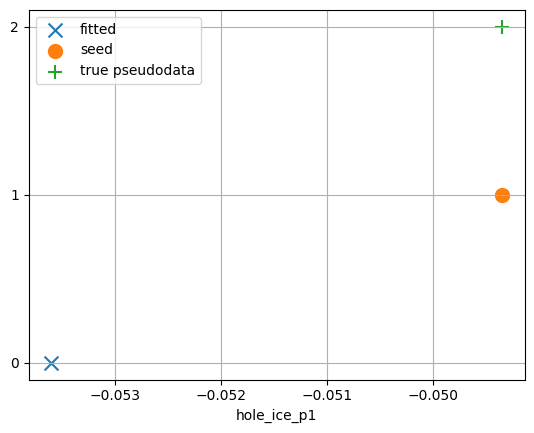

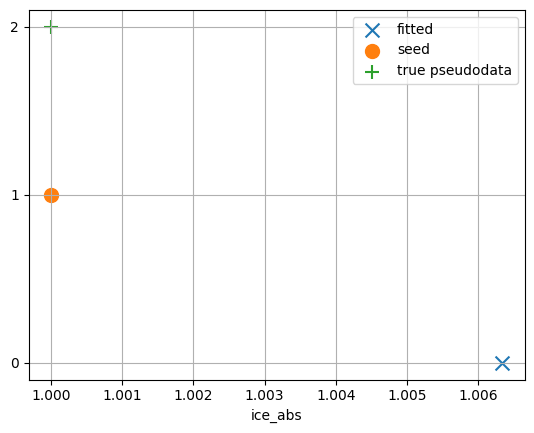

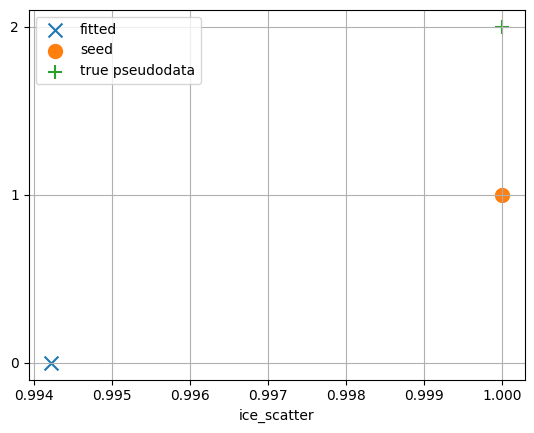

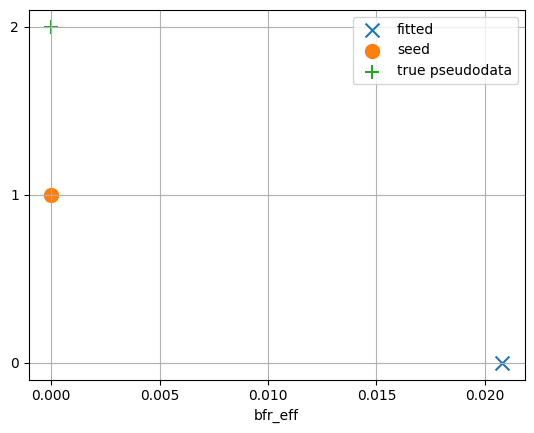

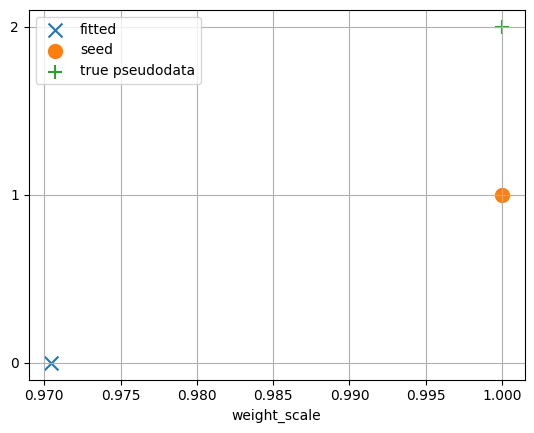

In [29]:
free_param_fit_results = fit_results["params"].free
for i,param in enumerate(free_param_fit_results):
    plt.scatter([param.value.m], [0], marker="x", s=100,label='fitted')
    # Plot the minimizer seed for the parameter (e.g. the initial value in the template)
    plt.scatter([param.nominal_value.m], [1], marker="o", s=100,label='seed')
    # Plot the true value of the param that was used to generate the pseudodata
    plt.scatter([data_maker.params[param.name].nominal_value.m], [2], marker="+", s=100,label='true pseudodata')
    # Make the plot nice to look at
    plt.grid(True)
    plt.xlabel(param.name)
    plt.yticks([0,1,2])
    plt.yticks(label=["Best fit", "Minimizer seed", "True value"])
    plt.legend()
    plt.show()

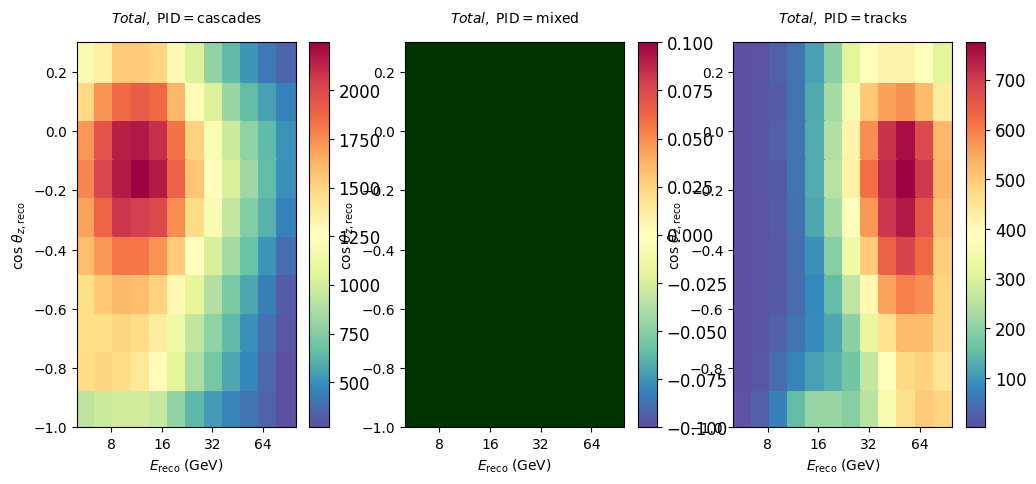

In [30]:
best_fit_template_ms = fit_results['hypo_asimov_dist']
best_fit_template = best_fit_template_ms.combine_wildcard('*')
fig, axes = plt.subplots(1, best_fit_template.binning.pid.num_bins, figsize=(12, 5))
for split_m, ax in zip(best_fit_template.split("pid"), axes):
    split_m.plot(ax=ax)

## Statistics Stuff

In [31]:
from pisa import ureg, Q_
from pisa.core.binning import OneDimBinning, MultiDimBinning
from pisa.utils.config_parser import parse_pipeline_config
from pisa.utils.log import set_verbosity, logging
from scipy import stats

In [32]:
set_verbosity(1)

In [33]:
def chi2_fit(chi2_vals):
    """Fit a standard chisquare distribution (just number of
    degrees of freedom, without location and scale parameters).
    """
    popt = stats.chi2.fit(chi2_vals, floc=0, fscale=1)
    df = popt[0]
    logging.info('chi2 fit df=%.4g' % df)
    fit_rv = stats.chi2(df=popt[0])
    return fit_rv

In [34]:
def integrate_fit_rv(fit_rv, edges):
    """Integrate frozen scipy.stats distribution between `edges`."""
    fit_rv_integrals = fit_rv.cdf(edges[1:]) - fit_rv.cdf(edges[:-1])
    return fit_rv_integrals

In [35]:
def histogram_chi2_vals(chi2_vals, edges, fit_rv):
    """Compare test statistic distribution to a fit
    by means of a histogram.
    """
    chi2_pdf = integrate_fit_rv(fit_rv, edges)
    ntrials = len(chi2_vals)
    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_xlabel(r'$\chi^2$', fontsize='x-large')
    ax.set_ylabel('AU', fontsize='x-large')
    ax.hist(
        chi2_vals,
        bins=edges,
        weights=np.ones_like(chi2_vals)/ntrials,
        color='k',
        label='%d trials' % ntrials
    )
    ax.step(x=(edges[1:] + edges[:-1])/2, y=chi2_pdf,
            where='mid', color='orange', lw=3, label=r'$\chi^2$ fit')
    ax.legend(loc='upper right', fontsize='large')

In [36]:
pipeline_cfg = parse_pipeline_config(neutrino_pipeline)
d1 = DistributionMaker(pipeline_cfg)
asimov_template = d1.get_outputs(return_sum=True)

[    INFO] Loading MCEq spline tables from : /afs/ifh.de/group/amanda/scratch/buchholl/software/fridge/analysis/common/data/flux/v02/MCEq_flux_gradient_splines_2212_GlobalSplineFitBeta_SIBYLL23C.pckl.bz2
[ WARNING] Could not find exact match for 1 nue_cc events (0.0002%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 43892 numu_cc events (4.2773%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 2025 nutau_cc events (0.5365%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 5 nuebar_cc events (0.0024%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 27780 numubar_cc events (5.7082%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find

In [37]:
import numpy.random as rand

In [38]:
def run_trials(asimov_template_truth, asimov_template_hypo, fluct_method='poisson', seed=0, ntrials=10000):
    """Generate `ntrials` pseudo-experiments by applying
    statistical fluctuations to `asimov_template_truth`
    according to `fluct_method` and comparing to
    `asimov_template_hypo`. Returns a list of chisquare
    values of length `ntrials`.
    """
    metric = 'binned_chi2'
    trial_chi2_vals = []
    all_binwise_chi2_vals = []
    for i in range(ntrials):
        seed = rand.randint(0,2**32)
        pseudo_exp_template = asimov_template_truth.fluctuate(
            method=fluct_method, random_state=seed
        )
        binned_chi2 = pseudo_exp_template.metric_per_map(
            expected_values=asimov_template_hypo, metric=metric
        )
        # We know the only `Map` in here is called 'total' since we've
        # set `return_sum=True` in the call to `get_outputs`.
        # record the individual chisquare values per bin
        binwise_chi2 = binned_chi2['total']
        all_binwise_chi2_vals.extend(binwise_chi2)
        # make sum of binwise chisquare values for this trial
        total_chi2 = binned_chi2['total'].sum()
        trial_chi2_vals.append(total_chi2)
    return trial_chi2_vals, all_binwise_chi2_vals

In [39]:
trial_chi2_vals, all_binwise_chi2_vals = run_trials(
    asimov_template_truth=asimov_template,
    asimov_template_hypo=asimov_template
)

[ WARNING] /afs/ifh.de/group/amanda/scratch/buchholl/software/snuvenv/lib/python3.10/site-packages/numpy/lib/function_base.py:2387: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)



[    INFO] chi2 fit df=240.1


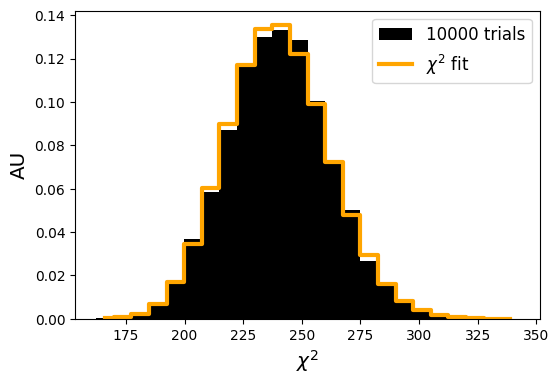

In [40]:
fit_rv = chi2_fit(trial_chi2_vals)
edges = np.linspace(0.99*min(trial_chi2_vals), 1.01*max(trial_chi2_vals), 25)
histogram_chi2_vals(chi2_vals=trial_chi2_vals, edges=edges, fit_rv=fit_rv)

In [41]:
print(len(d1.params.free.names))
A = asimov_template[0]
print(A.binning)

18
"reco_oscNext":
12 (reco_energy) x 10 (reco_coszen) x 3 (pid)


In [42]:
stages = list(pipeline_cfg.keys())
# the histogramming stage is the last one
output_binning = pipeline_cfg[stages[-2]]['apply_mode']
output_binning.mask.setfield(np.ones(output_binning.mask.shape),dtype='bool')
# downsample energy and coszen dimensions by a factor of 2, but leaving pid unchanged, doesnt work with masks
#new_output_binning = output_binning.downsample(reco_energy=2, reco_coszen=2)
pipeline_cfg[stages[-1]]['apply_mode'] = output_binning
# get the new Asimov template
d2 = DistributionMaker(pipeline_cfg)
asimov_template = d2.get_outputs(return_sum=True)

[    INFO] Loading MCEq spline tables from : /afs/ifh.de/group/amanda/scratch/buchholl/software/fridge/analysis/common/data/flux/v02/MCEq_flux_gradient_splines_2212_GlobalSplineFitBeta_SIBYLL23C.pckl.bz2
[ WARNING] Could not find exact match for 1 nue_cc events (0.0002%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 43892 numu_cc events (4.2773%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 2025 nutau_cc events (0.5365%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 5 nuebar_cc events (0.0024%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 27780 numubar_cc events (5.7082%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find

In [43]:
trial_chi2_vals, all_binwise_chi2_vals = run_trials(
    asimov_template_truth=asimov_template,
    asimov_template_hypo=asimov_template
)

[    INFO] chi2 fit df=360.1


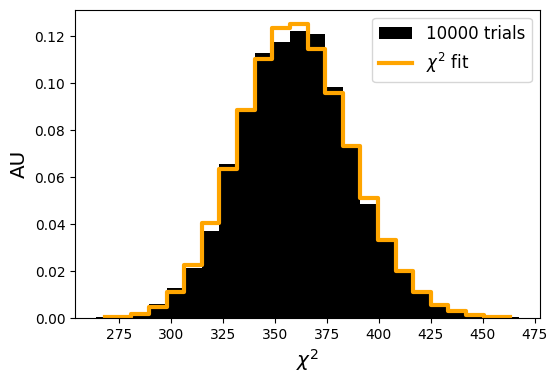

In [44]:
fit_rv = chi2_fit(trial_chi2_vals)
edges = np.linspace(0.99*min(trial_chi2_vals), 1.01*max(trial_chi2_vals), 25)
histogram_chi2_vals(trial_chi2_vals, edges, fit_rv)

In [45]:
# your code here
d1.params.free.names
asimov_template[0].binning

MultiDimBinning([
    OneDimBinning('reco_energy', 12 logarithmically-regular bins spanning [5.000000000000001, 100.0] GeV (behavior is logarithmic))),
    OneDimBinning('reco_coszen', 10 linearly-regular bins spanning [-1.0, 0.3] (behavior is linear))),
    OneDimBinning('pid', 3 bins with edges at [0.0, 0.38, 0.64, 1.0] (behavior is linear), bin_names=['cascades', 'mixed', 'tracks']))])

In [46]:
norm_assumed = d2.params['aeff_scale'].value
print(norm_assumed)

1.0 dimensionless


In [47]:
# create the template with a slightly higher value of the norm
norm_high = 1.01 * ureg.dimensionless
d2.params['aeff_scale'].value = norm_high
asimov_template_norm_high = d2.get_outputs(return_sum=True)

In [48]:
chi2_test = asimov_template.chi2_total(asimov_template_norm_high)['total']
logging.info(
    'Asimov chisquare=%.4g' % chi2_test
)

[    INFO] Asimov chisquare=21.9


In [49]:

highnorm_trial_chi2_vals, highnorm_all_binwise_chi2_vals = run_trials(
    asimov_template_truth=asimov_template,
    asimov_template_hypo=asimov_template_norm_high
)

Expectation_high_norm = np.average(highnorm_trial_chi2_vals)

pvalue = 1.- fit_rv.cdf(Expectation_high_norm)

print(pvalue)


0.24057765470236447


In [50]:
print(Expectation_high_norm)

378.679600398973


## Fit Stuff Experimentation Bootcamp Things Part Deux

In [51]:
theta23_test = np.linspace(38.0, 46.0, 65) * ureg.degree
xvals = np.sin(theta23_test.m_as('radian'))**2

In [52]:
d3 = DistributionMaker(template_pipeline_file)
asimov_truth = d3.get_outputs(return_sum=True)
pseudo_experiments_truth = [
    asimov_truth.fluctuate(method='poisson', random_state=0)
    for i in range(101)
]

[    INFO] Loading MCEq spline tables from : /afs/ifh.de/group/amanda/scratch/buchholl/software/fridge/analysis/common/data/flux/v02/MCEq_flux_gradient_splines_2212_GlobalSplineFitBeta_SIBYLL23C.pckl.bz2
[ WARNING] Could not find exact match for 1 nue_cc events (0.0002%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 43892 numu_cc events (4.2773%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 2025 nutau_cc events (0.5365%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 5 nuebar_cc events (0.0024%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find exact match for 27780 numubar_cc events (5.7082%) in the loaded DataFrame. Their gradients will be taken from the nearest neighbor.
[ WARNING] Could not find

In [53]:
asimov_delta_chi2s = []
all_trial_chi2s = []
for i, theta23_val in enumerate(theta23_test):
    # loop over discrete values of theta23
    d3.params['theta23'].value = theta23_val
    # obtain prediction given this value
    asimov_test = d3.get_outputs(return_sum=True)
    # calculate the difference in chisquare between Asimov datasets
    asimov_delta_chi2 = asimov_truth.chi2_total(asimov_test)['total']
    asimov_delta_chi2s.append(asimov_delta_chi2)
    hypo_trial_chi2s = []
    for pseudo_exp in pseudo_experiments_truth:
        trial_chi2 = pseudo_exp.chi2_total(asimov_test)['total']
        hypo_trial_chi2s.append(trial_chi2)
    all_trial_chi2s.append(hypo_trial_chi2s)

In [54]:
all_trial_delta_chi2s = np.subtract(
    all_trial_chi2s, np.min(all_trial_chi2s, axis=0)
)
median_delta_chi2s = np.median(all_trial_delta_chi2s, axis=1)
delta_chi2s_std_dev = np.percentile(
    all_trial_delta_chi2s,
    q=[100*stats.norm.sf(2.0),
       100*stats.norm.sf(1.0),
       100*stats.norm.cdf(1.0),
       100*stats.norm.cdf(2.0)],
    axis=1
)

In [55]:
from scipy.interpolate import UnivariateSpline
sp = UnivariateSpline(xvals, np.subtract(median_delta_chi2s, 1.0), s=0, check_finite=True)
ci_1sigma = sp.roots()

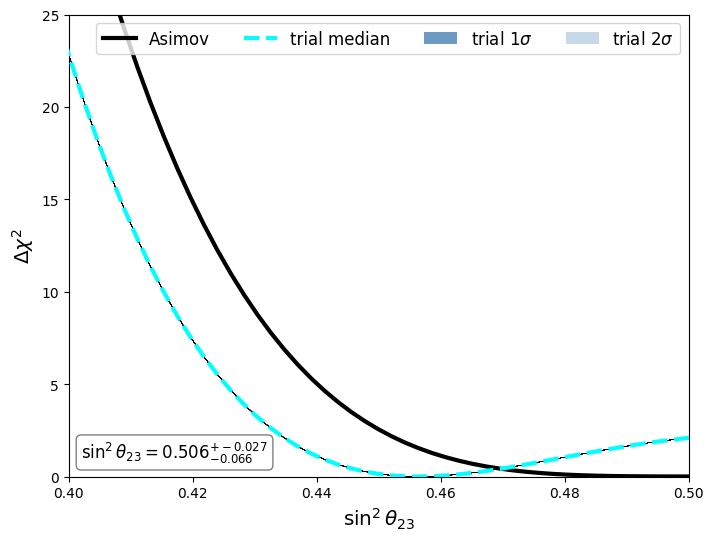

In [56]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(
    xvals, asimov_delta_chi2s,
    label='Asimov', zorder=3, lw=3, color='k'
)
ax.plot(xvals, all_trial_delta_chi2s ,lw=0.1, color='k')
ax.plot(xvals, median_delta_chi2s,
        lw=3, color='cyan', ls='dashed',
        label='trial median', zorder=4
)
ax.set_xlabel(r'$\sin^2 \theta_{23}$', fontsize='x-large')
ax.set_ylabel(r'$\Delta \chi^2$', fontsize='x-large')
ax.set_ylim(0, 25)

# truth value
sin2_t23_truth = np.sin(d3.params['theta23'].nominal_value.m_as('radian'))**2
ax.vlines(
    x=sin2_t23_truth,
    ymin=0, ymax=25, linestyles='dashed', lw=3
)

# report the 1 sigma uncertainties
ax.text(x=0.402, y=1,
        s=r'$\sin^2 \theta_{23} = %.3f^{+%.3f}_{%.3f}$'
        % (sin2_t23_truth, max(ci_1sigma)-sin2_t23_truth, min(ci_1sigma) - sin2_t23_truth),
        fontsize='large',
        bbox=dict(fc='w', alpha=0.5, boxstyle='round'))

# delta chi2 1 sigma statistical uncertainty band
ax.fill_between(
    x=xvals, y1=delta_chi2s_std_dev[1], y2=delta_chi2s_std_dev[2],
    facecolor='steelblue', label=r'trial $1\sigma$', alpha=0.8)

# delta chi2 2 sigma statistical uncertainty band
ax.fill_between(
    x=xvals, y1=delta_chi2s_std_dev[0], y2=delta_chi2s_std_dev[3],
    facecolor='steelblue', label=r'trial $2\sigma$', alpha=0.3)
ax.set_xlim(0.4, 0.5)
ax.legend(loc='upper right', fontsize='large', ncol=4)
plt.show()

## Fitting part 3

In [57]:
fc_theta23_vals = [np.arcsin(np.sqrt(min(ci_1sigma))),
                   np.arcsin(np.sqrt(max(ci_1sigma)))] * ureg.radian

In [58]:
def fit_theta23_to_trial(true_theta23, pseudo_exp, asimov_truth, hypo_maker):
    """Fit theta23 to a pseudo-experiment by probing discrete
    values and returning the delta chisquare difference to the
    truth hypothesis.
    """
    # to save time we only probe a fairly coarse grid
    # of values (which is also quite restricted),
    # and as a result the minimum will just
    # be an approximation - this part would be replaced
    # by a numerical optimisation routine in a real analysis,
    # with some number of nuisance parameters
    theta23_test = np.linspace(40.0, 44.0, 25) * ureg.degree
    all_test_chi2s = []
    for theta23_val in theta23_test:
        hypo_maker.params['theta23'].value = theta23_val
        asimov_test = hypo_maker.get_outputs(return_sum=True)
        chi2_test = pseudo_exp.chi2_total(asimov_test)['total']
        all_test_chi2s.append(chi2_test)
    best_chi2 = min(all_test_chi2s)
    trial_delta_chi2 = pseudo_exp.chi2_total(asimov_truth)['total'] - best_chi2
    return trial_delta_chi2

In [59]:
#Has runtime of multiple hours
#Added for sake of completion

'''
%%time
ntrials = 500
# will hold npoints x ntrials test statistic values
fc_delta_chi2s = []
for i, fc_theta23 in enumerate(fc_theta23_vals):
    if i==1:
        break
    # will hold ntrials test statistic values
    fc_delta_chi2s_p = []
    # scan over true values of theta23
    d3.params['theta23'].value = fc_theta23
    # we will compare each trial's best fit to
    # this asimov dataset
    asimov_truth = d3.get_outputs(return_sum=True)
    for trial in xrange(ntrials):
        logging.info(
            'Fitting trial %d for truth point: %s'
            % (trial, fc_theta23)
        )
        # generate random pseudo-experiment
        pseudo_exp = asimov_truth.fluctuate(
            method='poisson', random_state=0, jumpahead=trial
        )
        # fit theta23 to that and get test statistic value
        trial_delta_chi2 = fit_theta23_to_trial(
            true_theta23=fc_theta23,
            pseudo_exp=pseudo_exp,
            asimov_truth=asimov_truth,
            hypo_maker=d3
        )
        fc_delta_chi2s_p.append(trial_delta_chi2)
    fc_delta_chi2s.append(fc_delta_chi2s_p)
'''
pass

In [60]:
# load precomputed FC trials
fc_delta_chi2s = np.load('/afs/ifh.de/user/b/buchholl/scratch/software/fridge/analysis/bootcamp/fc_delta_chi2_vals.npy')

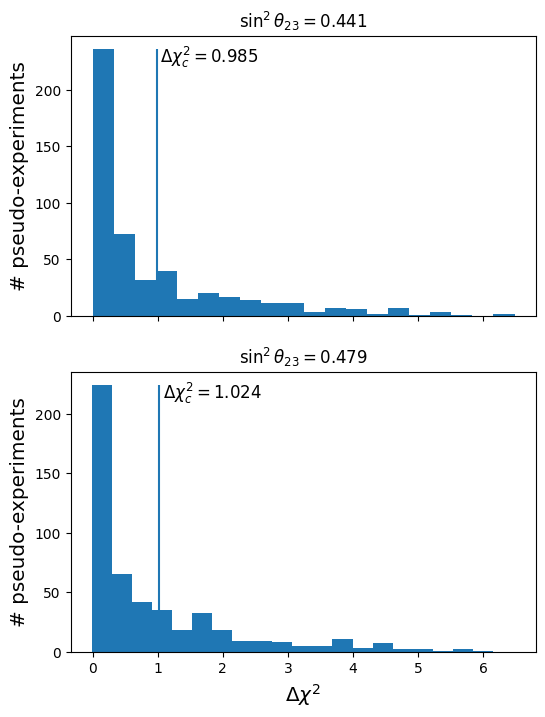

In [61]:
fig, axes = plt.subplots(nrows=len(fc_delta_chi2s), ncols=1,
                         figsize=(6,8), sharex=True)

crit_vals = []
for set_of_delta_chi2s, fc_t23, ax in zip(fc_delta_chi2s, fc_theta23_vals, axes):
    crit_val = np.percentile(set_of_delta_chi2s, q=100*stats.chi2.cdf(1.0, df=1))
    crit_vals.append(crit_val)
    # plot histogram of individual chisquare values
    # together with the critical value as per FC procedure
    n, edges, patches = ax.hist(set_of_delta_chi2s, bins=20)
    ax.vlines(x=crit_val, ymin=0, ymax=max(n))
    ax.set_ylabel(r'# pseudo-experiments', fontsize='x-large')
    ax.set_title(r'$\sin^2 \theta_{23} = %.3f$' % np.sin(fc_t23)**2)
    ax.text(x=1.05*crit_val, y=0.95*max(n),
            s=r'$\Delta \chi^2_c = %.3f$' % crit_val,
            fontsize='large')
ax.set_xlabel(r'$\Delta \chi^2$', fontsize='x-large')
plt.show()